Data Load into dataframe

In [7]:
import pandas as pd
df = pd.read_csv('data/Data_Train.csv')
df.head()

,ID,Asst_Reg,GGGrade,Experience,Validation,Yearly_Income,Home_Status,Unpaid_2_years,Already_Defaulted,Designation,...,File_Status,State,Account_Open,Total_Unpaid_CL,Duration,Unpaid_Amount,Reason,Claim_Type,Due_Fee,Default
0,95074,421802,II,>10yrs,Vfied,633600.00,MORTGAGE,0,0,GLENDALE NISSAN,...,fully paid,California,17,58598.0,3 years,31216.05,debt consolidation,I,0.0,0
1,134131,3964312,IV,7yrs,Source Verified,85483.20,RENT,0,0,Business Teacher,...,whole,NC,15,18924.0,5 years,11660.49,debt consolidation,I,0.0,0
2,92602,4247560,III,<1yr,Source Verified,79200.00,RENT,0,0,driver,...,whole,Florida,7,15604.0,5 years,5637.87,major purchase,I,0.0,0
3,22591,197179,III,<1yr,Vfied,61600.00,RENT,0,0,AvePoint,...,fully paid,NewJersey,9,22410.0,3 years,15607.17,major purchase,I,0.0,1
4,125060,4646684,V,2yrs,Source Verified,68053.92,RENT,0,0,Lead Tester,...,fully paid,LA,10,36022.0,5 years,27472.86,debt consolidation,I,0.0,0


In [8]:
# encode GGGrade from roman numerals to integers and drop the original column
df['GGGrade'] = df['GGGrade'].map({'I':1, 'II':2, 'III':3, 'IV':4, 'V':5})
# set designation to lowercase
df['Designation'] = df['Designation'].str.lower()

df.head()


,ID,Asst_Reg,GGGrade,Experience,Validation,Yearly_Income,Home_Status,Unpaid_2_years,Already_Defaulted,Designation,...,File_Status,State,Account_Open,Total_Unpaid_CL,Duration,Unpaid_Amount,Reason,Claim_Type,Due_Fee,Default
0,95074,421802,2.0,>10yrs,Vfied,633600.00,MORTGAGE,0,0,glendale nissan,...,fully paid,California,17,58598.0,3 years,31216.05,debt consolidation,I,0.0,0
1,134131,3964312,4.0,7yrs,Source Verified,85483.20,RENT,0,0,business teacher,...,whole,NC,15,18924.0,5 years,11660.49,debt consolidation,I,0.0,0
2,92602,4247560,3.0,<1yr,Source Verified,79200.00,RENT,0,0,driver,...,whole,Florida,7,15604.0,5 years,5637.87,major purchase,I,0.0,0
3,22591,197179,3.0,<1yr,Vfied,61600.00,RENT,0,0,avepoint,...,fully paid,NewJersey,9,22410.0,3 years,15607.17,major purchase,I,0.0,1
4,125060,4646684,5.0,2yrs,Source Verified,68053.92,RENT,0,0,lead tester,...,fully paid,LA,10,36022.0,5 years,27472.86,debt consolidation,I,0.0,0


In [9]:
# print unique values for each column
for col in df.columns:
    print(col, df[col].unique())

ID [ 95074 134131  92602 ... 102153 115343 104968]
Asst_Reg [ 421802 3964312 4247560 ... 2624710 5966919 6637289]
GGGrade [ 2.  4.  3.  5. nan  1.]
Experience ['>10yrs' '7yrs' '<1yr' '2yrs' '1yrs' '4yrs' '9yrs' '6yrs' '5yrs' '8yrs'
 '3yrs']
Validation ['Vfied' 'Source Verified' 'Not Vfied']
Yearly_Income [633600.    85483.2   79200.   ... 510398.24 154191.84  90423.52]
Home_Status ['MORTGAGE' 'RENT' 'OWN' 'OTHER' 'NONE']
Unpaid_2_years [ 0  4  2  1  3 11  5  6  7  9 12  8 10 18 16 15 13 14]
Already_Defaulted [0 1 2 6 5 4 3]
Designation ['glendale nissan' 'business teacher' 'driver' ... 'engineer support ii'
 'interface coordinator' 'parts clerk']
Debt_to_Income [12.5496  9.0048 24.9144 ... 65.7216  0.4032 63.6888]
Postal_Code [91300. 27400. 32800.  7000. 70800. 77000. 92100.  6000. 92500. 78500.
 95900. 49400. 97200. 72200. 11900. 91900. 59100. 28300. 80800. 72900.
 45000. 27500. 87100. 55000. 30300.    nan 11700. 75200. 20800. 32500.
 35400. 28000. 29700. 17700. 95800. 85700. 84400. 1

In [10]:
# print the average yearly income of people who are in default
print(df[df['Default'] == 1]['Yearly_Income'].mean())

134271.61678584345


In [11]:
import numpy as np
from sklearn.preprocessing import LabelEncoder

# One-hot encoding for low cardinality categorical variables
one_hot_columns = ['Home_Status', 'File_Status', 'Claim_Type', 'Validation', 'Duration']
df_encoded = pd.get_dummies(df, columns=one_hot_columns)

# Label encoding for high cardinality or ordinal categorical variables
label_columns = ['Asst_Reg', 'Designation', 'State', 'Reason', 'Sub_GGGrade']
label_encoder = LabelEncoder()

for col in label_columns:
    df_encoded[col + '_encoded'] = label_encoder.fit_transform(df_encoded[col].astype(str))
    
# Drop original categorical columns after encoding
df_encoded = df_encoded.drop(columns=label_columns)

# Preprocess the Experience column
def preprocess_experience(exp):
    if pd.isna(exp):
        return np.nan
    elif 'yrs' in exp:
        return float(exp.replace('yrs', '').replace('>', '').strip())
    elif '<1yr' in exp:
        return 0.5
    else:
        return np.nan

# Apply preprocessing to the Experience column
df_encoded['Experience'] = df_encoded['Experience'].apply(preprocess_experience)

# Handle any remaining NaN values (you might want to impute or drop them based on your preference)
df_encoded = df_encoded.dropna()

# Separate features and target
X = df_encoded.drop('Default', axis=1)
y = df_encoded['Default']


In [12]:
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV, train_test_split
import seaborn as sns

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define classifiers and their parameter grids
classifiers = {
    'Logistic Regression': (LogisticRegression(), {
        'C': [0.001, 0.01, 0.1, 1, 10, 100],
        'penalty': ['l1', 'l2']
    }),
    'Decision Tree': (DecisionTreeClassifier(), {
        'max_depth': [3, 5, 10, None],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }),
    'Random Forest': (RandomForestClassifier(), {
        'n_estimators': [50, 100, 200],
        'max_depth': [3, 5, 10, None],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }),
    'SVM': (SVC(), {
        'C': [0.1, 1, 10],
        'kernel': ['rbf', 'linear'],
        'gamma': ['scale', 'auto']
    })
}
# Function to plot confusion matrix
def plot_confusion_matrix(cm, title):
    plt.figure(figsize=(10,7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()



Running GridSearch for Logistic Regression...


/Users/georgeli/code/loan-default-analysis/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
30 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/georgeli/code/loan-default-analysis/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/georgeli/code/loan-default-analysis/.venv/lib/python3.12/site-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users

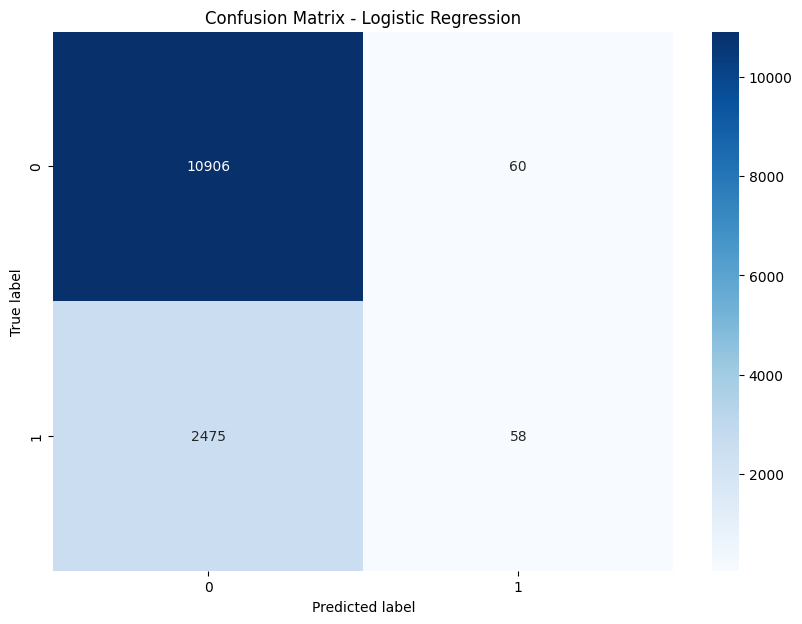

Running GridSearch for Decision Tree...


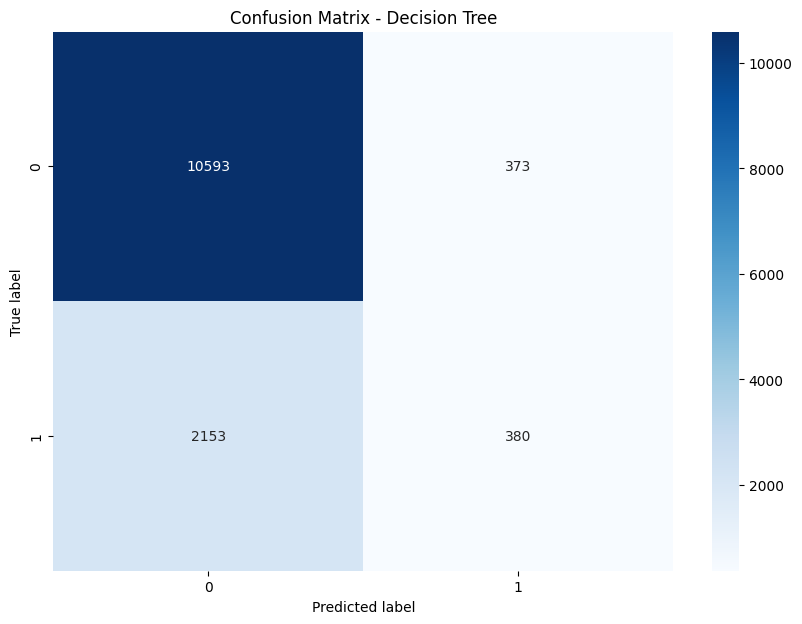

Running GridSearch for Random Forest...


In [ ]:
from sklearn.metrics import confusion_matrix

# Perform GridSearch for each classifier
results = {}

for name, (classifier, param_grid) in classifiers.items():
    print(f"Running GridSearch for {name}...")
    grid_search = GridSearchCV(classifier, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train_scaled, y_train)
    
    # Make predictions
    y_pred = grid_search.predict(X_test_scaled)
    
    # Compute confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    
    # Store results
    results[name] = {
        'best_params': grid_search.best_params_,
        'best_score': grid_search.best_score_,
        'test_accuracy': accuracy_score(y_test, y_pred),
        'classification_report': classification_report(y_test, y_pred),
        'confusion_matrix': cm
    }
    
    # Plot confusion matrix
    plot_confusion_matrix(cm, f'Confusion Matrix - {name}')

# Print results
for name, result in results.items():
    print(f"\nResults for {name}:")
    print(f"Best Parameters: {result['best_params']}")
    print(f"Best Cross-Validation Score: {result['best_score']:.4f}")
    print(f"Test Accuracy: {result['test_accuracy']:.4f}")
    print("Classification Report:")
    print(result['classification_report'])

# Find the best overall model
best_model = max(results, key=lambda x: results[x]['test_accuracy'])
print(f"\nBest overall model: {best_model}")
print(f"Best overall test accuracy: {results[best_model]['test_accuracy']:.4f}")